In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as ss
import statsmodels.api as sm

In [103]:
data_store = pd.read_csv("googleplaystore.csv", header=0)
data_customer = pd.read_csv("googleplaystore_user_reviews.csv")
#Data version 5 from kaggle

In [87]:
def lack_table(df): 
    null_val = df.isnull().sum()
    percent = 100 * df.isnull().sum()/len(df)
    lack_table = pd.concat([null_val, percent], axis=1)
    lack_table_ren_columns = lack_table.rename(
    columns = {0 : '欠損数', 1 : '%'})
    return lack_table_ren_columns



### 欠損値検査

In [88]:
lack_table(data_store)

,欠損数,%
App,0,0.000000
Category,0,0.000000
Rating,1474,13.596532
Reviews,0,0.000000
Size,0,0.000000
Installs,0,0.000000
Type,1,0.009224
Price,0,0.000000
Content Rating,1,0.009224
Genres,0,0.000000


In [89]:
lack_table(data_customer)

,欠損数,%
App,0,0.000000
Translated_Review,26868,41.788631
Sentiment,26863,41.780854
Sentiment_Polarity,26863,41.780854
Sentiment_Subjectivity,26863,41.780854


#### 欠損値処理

##### Data store

In [238]:
data_store["Rating"] = data_store["Rating"].fillna(data_store["Rating"].median())
data_store["Type"] = data_store["Type"].fillna("Free")
data_store["Content Rating"] = data_store["Content Rating"].fillna("Everyone")
data_store["Current Ver"] = data_store["Current Ver"].fillna("unknown")
data_store["Android Ver"].loc[4453] = "Only custom farm ware 8.1or 9.0 "
data_store["Android Ver"].loc[4490] = "4.0.3 and up"
data_store["Android Ver"].loc[10472] = "4.0 and up"
data_store["Rating"].loc[10472] = 4.7
data_store["Category"].loc[10472] = "TOOLS"
data_store["Reviews"].loc[10472] = "19"
data_store["Size"].loc[10472] = "3.0M"
data_store["Installs"].loc[10472] = "1,000+"
data_store["Type"].loc[10472] = "Free"
data_store["Price"].loc[10472] = 0
data_store["Content Rating"].loc[10472] = "Everyone"
data_store["Genres"].loc[10472] = "Everyone"
data_store["Last Updated"].loc[10472] = "February 11, 2018"
data_store["Current Ver"].loc[10472] = "1.0.19"

/Users/kozuzu931/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


#### Data customer

In [239]:
data_customer["Translated_Review"] = data_customer["Translated_Review"].fillna("No comments")
data_customer["Sentiment"] = data_customer["Sentiment"].fillna("No comments")
data_customer["Sentiment_Polarity"] = data_customer["Sentiment_Polarity"].fillna("No comments")
data_customer["Sentiment_Subjectivity"] = data_customer["Sentiment_Subjectivity"].fillna("No comments")

### 欠損値処理確認

In [120]:
lack_table(data_store)

,欠損数,%
App,0,0.0
Category,0,0.0
Rating,0,0.0
Reviews,0,0.0
Size,0,0.0
Installs,0,0.0
Type,0,0.0
Price,0,0.0
Content Rating,0,0.0
Genres,0,0.0


In [121]:
lack_table(data_customer)

,欠損数,%
App,0,0.0
Translated_Review,0,0.0
Sentiment,0,0.0
Sentiment_Polarity,0,0.0
Sentiment_Subjectivity,0,0.0


# Store data analysis

In [122]:
data_store

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [123]:
app_names_list = data_store["App"].unique()
print("google play storeアプリタイトル数: {} apps".format(len(app_names_list)))

google play storeアプリタイトル数: 9660 apps


## カテゴリー

In [124]:
category_names_list = data_store["Category"].unique()
print("google play storeカテゴリー数: {}".format(len(category_names_list)))

google play storeカテゴリー数: 34


In [125]:
category_data = data_store.groupby("Category").count()
category_values = np.delete(np.sort(category_data["App"].values), 0)
sorted_category_name = np.delete(category_data.App.sort_values().index.values, 0)
category_name_position = np.arange(0, len(sorted_category_name))
width = 0.5

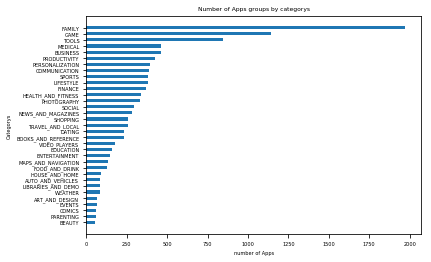

In [137]:
plt.barh(category_name_position + width, category_values, width, tick_label=sorted_category_name)
plt.rcParams["font.size"] = 5
plt.xlabel("number of Apps")
plt.ylabel("Categorys")
plt.title("Number of Apps groups by categorys")
plt.show()

In [127]:
pd.DataFrame(category_values[::-1], index=sorted_category_name[::-1])
#sorted_category_name, category_values

,0
FAMILY,1972
GAME,1144
TOOLS,843
MEDICAL,463
BUSINESS,460
PRODUCTIVITY,424
PERSONALIZATION,392
COMMUNICATION,387
SPORTS,384
LIFESTYLE,382


## レーティング

In [160]:
Rating_stastitics = pd.DataFrame(pd.Series(data_store["Rating"].ravel()).describe()).transpose()
Rating_stastitics

,count,mean,std,min,25%,50%,75%,max
0,10841.0,4.206522,0.480343,1.0,4.1,4.3,4.5,5.0


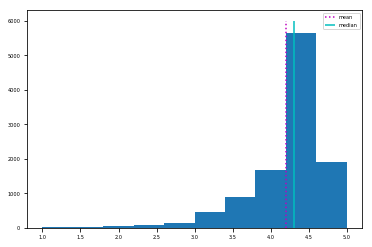

In [187]:
plt.hist(data_store["Rating"])
plt.vlines(x=[data_store["Rating"].mean()], ymin=0.0, ymax=6000.0, colors="m", linestyle=":", label="mean")
plt.vlines(x=[data_store["Rating"].median()], ymin=0.0, ymax=6000.0, colors="c", linestyle="-", label="median")
plt.legend()

## レビュー数

In [200]:
pd.DataFrame(data_store.sort_values("Reviews", ascending=False))

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2989,GollerCepte Live Score,SPORTS,4.2,9992,31M,"1,000,000+",Free,0,Everyone,Sports,"May 23, 2018",6.5,4.1 and up
4970,Ad Block REMOVER - NEED ROOT,TOOLS,3.3,999,91k,"100,000+",Free,0,Everyone,Tools,"December 17, 2013",3.2,2.2 and up
2723,SnipSnap Coupon App,SHOPPING,4.2,9975,18M,"1,000,000+",Free,0,Everyone,Shopping,"January 22, 2018",1.4,4.3 and up
2705,SnipSnap Coupon App,SHOPPING,4.2,9975,18M,"1,000,000+",Free,0,Everyone,Shopping,"January 22, 2018",1.4,4.3 and up
3079,US Open Tennis Championships 2018,SPORTS,4.0,9971,33M,"1,000,000+",Free,0,Everyone,Sports,"June 5, 2018",7.1,5.0 and up
3229,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22M,"500,000+",Free,0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up
3049,US Open Tennis Championships 2018,SPORTS,4.0,9971,33M,"1,000,000+",Free,0,Everyone,Sports,"June 5, 2018",7.1,5.0 and up
7002,Adult Color by Number Book - Paint Mandala Pages,FAMILY,4.3,997,Varies with device,"100,000+",Free,0,Everyone,Entertainment,"June 27, 2018",2.4,4.1 and up
6724,BSPlayer ARMv7 VFP CPU support,VIDEO_PLAYERS,4.3,9966,5.5M,"1,000,000+",Free,0,Everyone,Video Players & Editors,"March 31, 2017",1.23,2.1 and up
7982,"Easy Resume Builder, Resume help, Curriculum v...",TOOLS,4.3,996,10M,"50,000+",Free,0,Everyone,Tools,"September 28, 2017",2.3,4.0.3 and up


In [257]:
Reviews_line = data_store.loc[:, "Reviews"]
Reviews_line = pd.Series([int(i) for i in Reviews_line])
Reviews_line

0           159
1           967
2         87510
3        215644
4           967
5           167
6           178
7         36815
8         13791
9           121
10        13880
11         8788
12        44829
13         4326
14         1518
15           55
16         3632
17           27
18       194216
19       224399
20          450
21          654
22         7699
23           61
24          118
25          192
26        20260
27          203
28          136
29          223
          ...  
10811         4
10812        80
10813        20
10814       785
10815      5775
10816         2
10817       885
10818        96
10819        52
10820        22
10821         6
10822         0
10823         1
10824        67
10825         7
10826     88486
10827       117
10828       291
10829       603
10830       881
10831        38
10832      1195
10833        44
10834         7
10835         0
10836        38
10837         4
10838         3
10839       114
10840    398307
Length: 10841, dtype: in

In [258]:
Reviews_stastitics = pd.DataFrame(pd.Series(Reviews_line.ravel()).describe()).transpose()
Reviews_stastitics

,count,mean,std,min,25%,50%,75%,max
0,10841.0,444111.928051,2.927629e+06,0.0,38.0,2094.0,54768.0,78158306.0


(array([1.0796e+04, 2.8000e+01, 5.0000e+00, 3.0000e+00, 9.0000e+00]),
 array([       0.        , 15631661.2       , 31263322.4       ,
        46894983.59999999, 62526644.8       , 78158306.        ]),
 <a list of 5 Patch objects>)

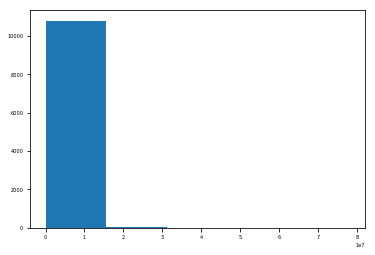

In [272]:
plt.hist(Reviews_line, bins=5)

In [ ]:
data_cumstmer

In [167]:
data_store.groupby("Rating").count()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
Rating,,,,,,,,,,,,
1.0,16,16,16,16,16,16,16,16,16,16,16,16
1.2,1,1,1,1,1,1,1,1,1,1,1,1
1.4,3,3,3,3,3,3,3,3,3,3,3,3
1.5,3,3,3,3,3,3,3,3,3,3,3,3
1.6,4,4,4,4,4,4,4,4,4,4,4,4
1.7,8,8,8,8,8,8,8,8,8,8,8,8
1.8,8,8,8,8,8,8,8,8,8,8,8,8
1.9,13,13,13,13,13,13,13,13,13,13,13,13
2.0,12,12,12,12,12,12,12,12,12,12,12,12


In [234]:
int('3')

3